<a href="https://colab.research.google.com/github/hoaint25/Applied_charting_plotting_in_python/blob/main/Week4_Assignment/Week4_assign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from turtle import title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as st 
import matplotlib.colors as col 
import seaborn as sns 
import re 

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

plt.style.use('seaborn-colorblind')

dict_datasets = {"Tigers":"List of Detroit Tigers seasons - Wikipedia.html",
                  "Lions":"List of Detroit Lions seasons - Wikipedia.html",
                  "Pistons":"List of Detroit Pistons seasons - Wikipedia.html",
                  "RedWings":"List of Detroit Red Wings seasons - Wikipedia.html",}

In [5]:
##Lions 

df_lions = pd.read_html('/content/List of Detroit Lions seasons - Wikipedia.html')[1][6:92]
lions = pd.DataFrame()
lions['Year'] = df_lions['Season']
lions['Year'] = lions['Year'].str[:4]
lions['Wins'] = df_lions['Regular season']['.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}W'].astype(int)
lions['Losses'] = df_lions['Regular season']['L'].astype(int)

lions['% Wins Lions'] = lions['Wins']/(lions['Wins'] + lions['Losses'])
print(lions.head(10))

    Year  Wins  Losses  % Wins Lions
6   1934    10       3      0.769231
7   1935     7       3      0.700000
8   1936     8       4      0.666667
9   1937     7       4      0.636364
10  1938     7       4      0.636364
11  1939     6       5      0.545455
12  1940     5       5      0.500000
13  1941     4       6      0.400000
14  1942     0      11      0.000000
15  1943     3       6      0.333333


In [6]:
##Tigers 

df_tigers = pd.read_html('/content/List of Detroit Tigers seasons - Wikipedia.html')[1]

tigers = pd.DataFrame()
tigers['Year'] = df_tigers['Season']
tigers['Wins'] = df_tigers['Wins']
tigers['Losses'] = df_tigers['Losses']
tigers.drop(tigers.tail(4).index,inplace=True)
tigers['Year'] = tigers['Year']
tigers['Wins'] = tigers['Wins'].astype(str).astype(int)
tigers['Losses'] = tigers['Losses'].astype(str).astype(int)

tigers['% Win Tigers'] = tigers['Wins']/(tigers['Wins'] + tigers['Losses'])
print(tigers.head(10))

   Year  Wins  Losses  % Win Tigers
0  1901    74      61      0.548148
1  1902    52      83      0.385185
2  1903    65      71      0.477941
3  1904    62      90      0.407895
4  1905    79      74      0.516340
5  1906    71      78      0.476510
6  1907    92      58      0.613333
7  1908    90      63      0.588235
8  1909    98      54      0.644737
9  1910    86      68      0.558442


In [7]:
#Pistons
df_pistons = pd.read_html('/content/List of Detroit Pistons seasons - Wikipedia.html')[1][11:90]
pistons = pd.DataFrame()
pistons['Year'] = df_pistons['Team'].str[:4]
pistons['Wins'] = df_pistons['Wins']
pistons['Losses'] = df_pistons['Losses']
pistons.drop(pistons.index[pistons['Wins'] == 'Detroit Pistons'], inplace = True)
pistons['Wins'] = pistons['Wins'].astype(int)
pistons['Losses'] = pistons['Wins'].astype(int)
tigers['% Win Pistons'] = tigers['Wins']/(tigers['Wins'] + tigers['Losses'])
print(pistons.head(10))


    Year  Wins  Losses
11  1950    32      32
12  1951    29      29
13  1952    36      36
14  1953    40      40
15  1954    43      43
16  1955    37      37
17  1956    34      34
19  1957    33      33
20  1958    28      28
21  1959    30      30


In [8]:
#Red Wings 
df_redw = pd.read_html('/content/List of Detroit Red Wings seasons - Wikipedia.html')[2][:94]
redw = pd.DataFrame()
df_redw = df_redw.reset_index(drop=True)
redw['Year'] = df_redw['NHL season']
redw['Year'] = redw['Year'].str[:4]
redw['Wins'] = df_redw['Regular season[3][6][7][8]']['W']
redw.drop(redw.index[redw['Wins'] == '—'], inplace = True)
redw['Wins'] = redw['Wins'].astype(int)
redw['Losses'] = df_redw['Regular season[3][6][7][8]']['L']
redw.drop(redw.index[redw['Losses'] == '—'], inplace = True)
redw['Losses'] = redw['Losses'].astype(int)
redw['% Win Redw'] = redw['Wins']/(redw['Wins'] + redw['Losses'])
print(redw.head(10))

   Year  Wins  Losses  % Win Redw
0  1926    12      28    0.300000
1  1927    19      19    0.500000
2  1928    19      16    0.542857
3  1929    14      24    0.368421
4  1930    16      21    0.432432
5  1931    18      20    0.473684
6  1932    25      15    0.625000
7  1933    24      14    0.631579
8  1934    19      22    0.463415
9  1935    24      16    0.600000


In [9]:
#Merge for visualize

#Step 1: merge Lions and Tigers 
merge1 = pd.merge(lions.drop(['Wins','Losses'], axis = 1), tigers.drop(['Wins','Losses'], axis = 1), on ='Year')
#Step 2: merge Lions, Tigers and Pistons 
merge2 = pd.merge(merge1, pistons.drop(['Wins','Losses'], axis = 1), on ='Year')
#Step3: merge merge with RedWings
merge_ = pd.merge(merge2, redw.drop(['Wins','Losses'], axis = 1), on = 'Year')
print(merge_.head(10))

   Year  % Wins Lions  % Win Tigers  % Win Pistons  % Win Redw
0  1950      0.500000      0.616883       0.616883    0.771930
1  1951      0.636364      0.474026       0.474026    0.758621
2  1952      0.750000      0.324675       0.324675    0.692308
3  1953      0.833333      0.389610       0.389610    0.660714
4  1954      0.818182      0.441558       0.441558    0.711864
5  1955      0.250000      0.512987       0.512987    0.555556
6  1956      0.750000      0.532468       0.532468    0.655172
7  1957      0.666667      0.506494       0.506494    0.500000
8  1958      0.363636      0.500000       0.500000    0.403226
9  1959      0.272727      0.493506       0.493506    0.472727


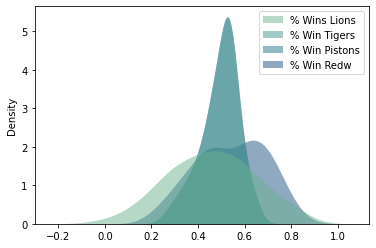

In [10]:
kde = sns.kdeplot(data = merge_,fill=True, common_norm=False, palette="crest", alpha=.5, linewidth=0)
kde.axis = ([0,1,0,7])


In [11]:
#Visualize line plot %Win Big4 in 2019
big4 = merge_.iloc[51:]
print(big4)

    Year  % Wins Lions  % Win Tigers  % Win Pistons  % Win Redw
51  2000        0.5625      0.487654       0.487654    0.710145
52  2001        0.1250      0.407407       0.407407    0.750000
53  2002        0.1875      0.341615       0.341615    0.705882
54  2003        0.3125      0.265432       0.265432    0.695652
55  2005        0.3125      0.438272       0.438272    0.783784
56  2006        0.1875      0.586420       0.586420    0.724638
57  2007        0.4375      0.543210       0.543210    0.720000
58  2008        0.0000      0.456790       0.456790    0.708333
59  2009        0.1250      0.527607       0.527607    0.647059
60  2010        0.3750      0.500000       0.500000    0.652778
61  2011        0.6250      0.586420       0.586420    0.631579
62  2012        0.2500      0.543210       0.543210    0.600000
63  2013        0.4375      0.574074       0.574074    0.582090
64  2014        0.6875      0.555556       0.555556    0.632353
65  2015        0.4375      0.459627    

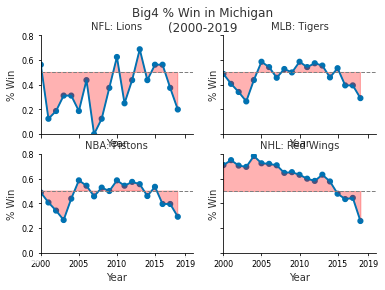

In [31]:
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2, 2, sharex = True, sharey = True)
axs = [ax1,ax2,ax3,ax4]

fig.suptitle('Big4 % Win in Michigan\n(2000-2019', alpha = 0.8)

#Properties 
columns_w = ['% Wins Lions', '% Win Tigers', '% Win Pistons', '% Win Redw']
colors = ['g','b','y','r']
title = ['NFL: Lions', 'MLB: Tigers', 'NBA: Pistons', 'NHL: Red Wings']
axis = [0,20,0,0.8]

y = 0.5

for i in range(len(axs)):
  ax = axs[i]
  sns.pointplot(x = big4['Year'], y = big4[columns_w[i]], scale = 0.7, alpha = 0.6, ax = ax)
  ax.axhline(y = 0.5, color = 'gray', linewidth = 1, linestyle = '--')
  ax.fill_between(range(0,19),0.5, big4[columns_w[i]], where = big4[columns_w[i]] < y , color = 'red', interpolate = True, alpha = 0.3)
  ax.fill_between(range(0,19), 0.5, big4[columns_w[i]], where = (big4[columns_w[i]]>y), color = 'red', interpolate = True, alpha = 0.3)

  #Beatify the plot 

  #turn off some plot rectangle spines
  [ax.spines[loc].set_visible(False) for loc in ['top', 'right']]
  ax.set_ylabel('% Win', alpha = 0.8)
  ax.set_xlabel('Year', alpha = 0.8)
  ax.set_title(title[i], fontsize = 10, alpha = 0.8)
  ax.axis(axis)
  ax.set_xticks(np.append(np.arange(0,20,5),19))
  ax.set_xticklabels(['2000','2005','2010','2015','2019'])
  for label in ax.get_xticklabels() + ax.get_yticklabels():
      label.set_fontsize(8)
      label.set_bbox(dict(facecolor = 'white', edgecolor = 'white', alpha = 0.8))

